<a href="https://colab.research.google.com/github/MuktoFlame/ML-Journey/blob/main/Support_Vector_Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machine

## Theory

### SVM

1. Supervised Learning Model
2. Both Classification & Regression
3. Hyperplane
4. Support Vector


Advantages:
- Works well with smaller datasts
- Works efficiently when there is a clear margin of separation
- Works well with high dimensional data


Disadvantages:
- Not suitable for large datasets as the training time is higher
- Not suitable for noisier datasets with overlapping classes

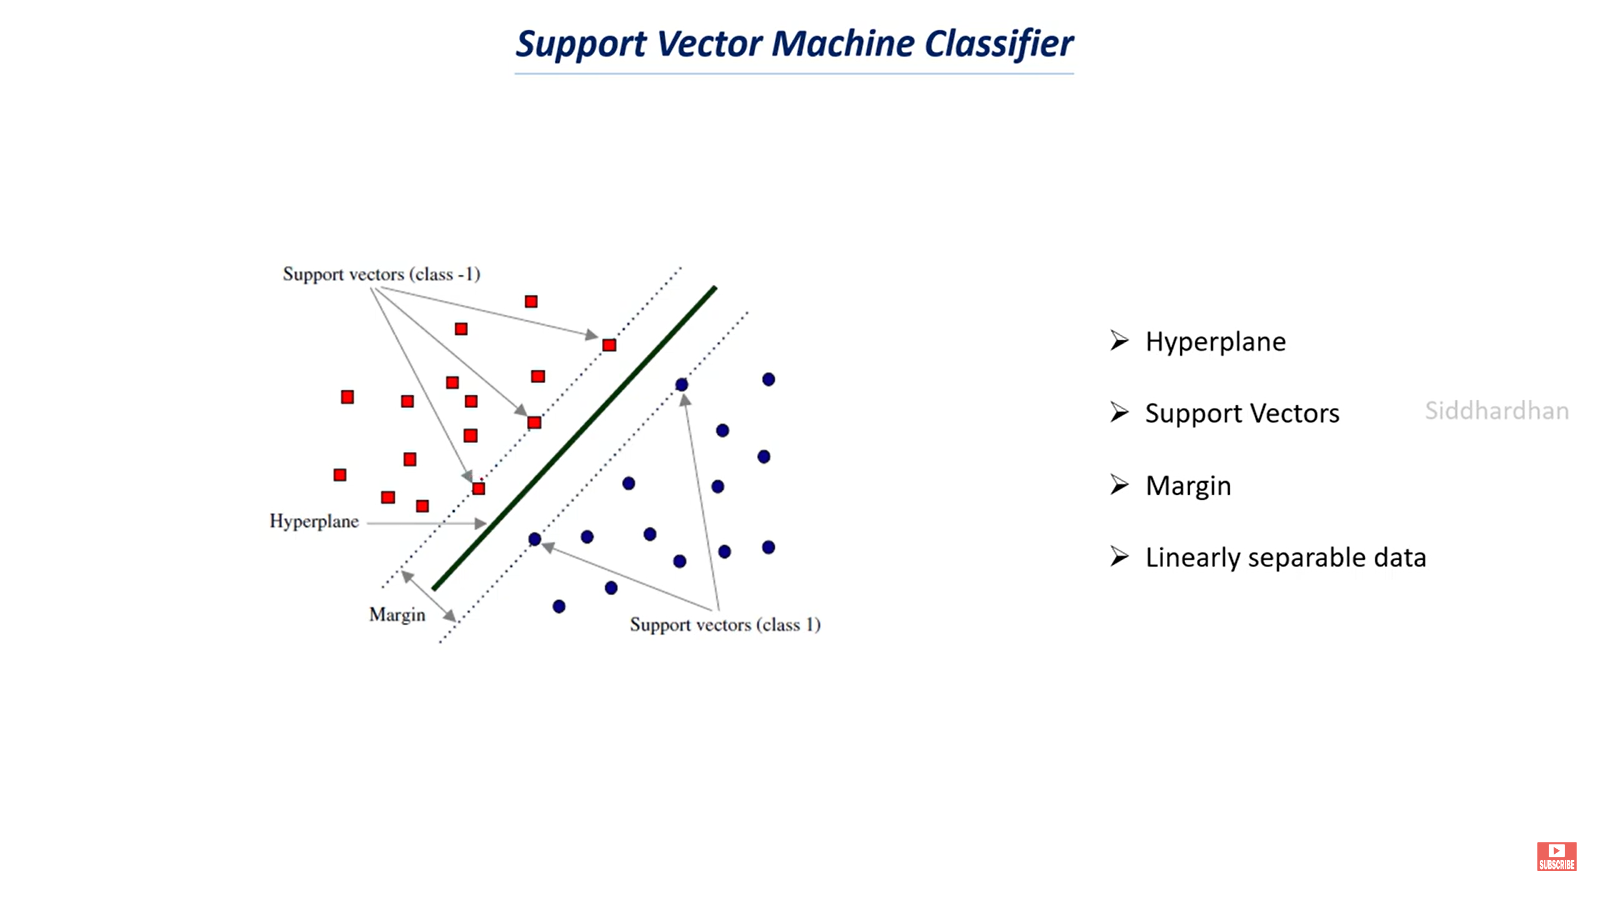

Hyperplane : Hyperplane is a line (in 2D space) or a plene that separate thhe data points into 2 classes.

Support vectors: Support vectors are the data points which lie nearest to the hyperplane. if these data ponts change, the position of the hyperplane changes.


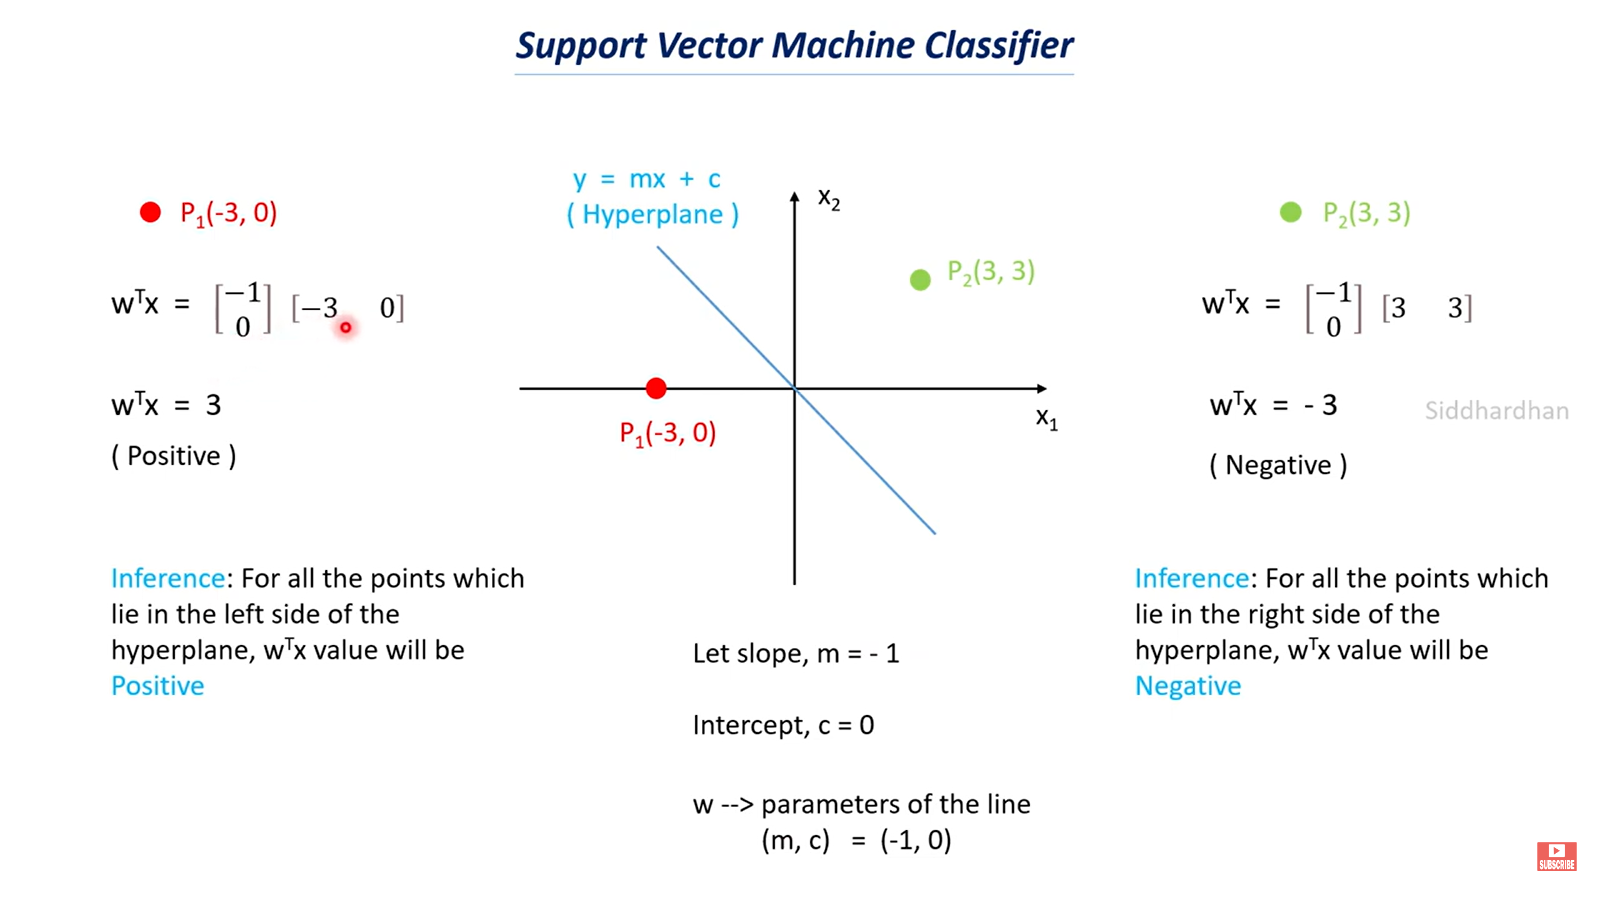

Here

$w^Tx = Label$   

$w^Tx + b = Label$

Classification is happening from the above equation. Depending on Label being position or negative or vice versa, we can consider a binary classification exists.

###Margine:

Margibe : Distance between the support vectors.

The higher the margine value is, better the classification will be.

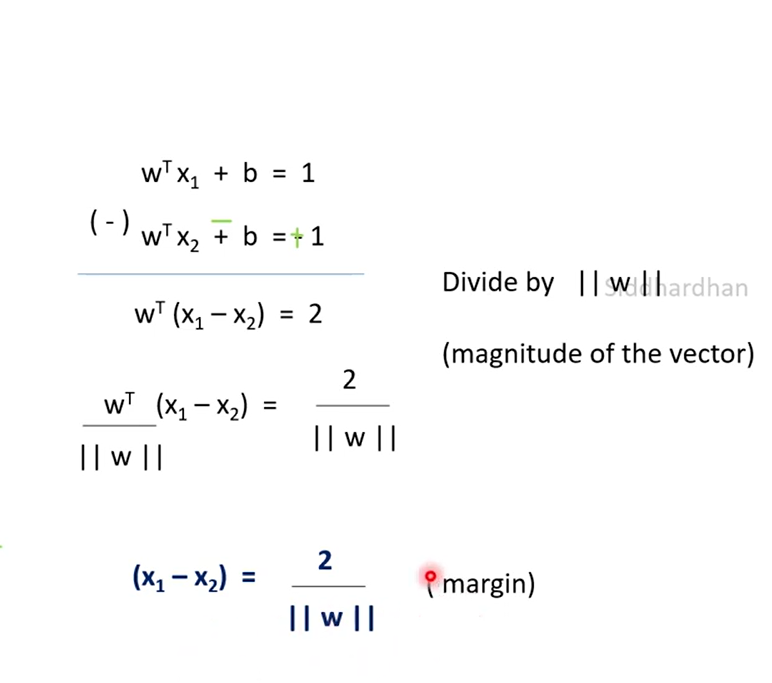

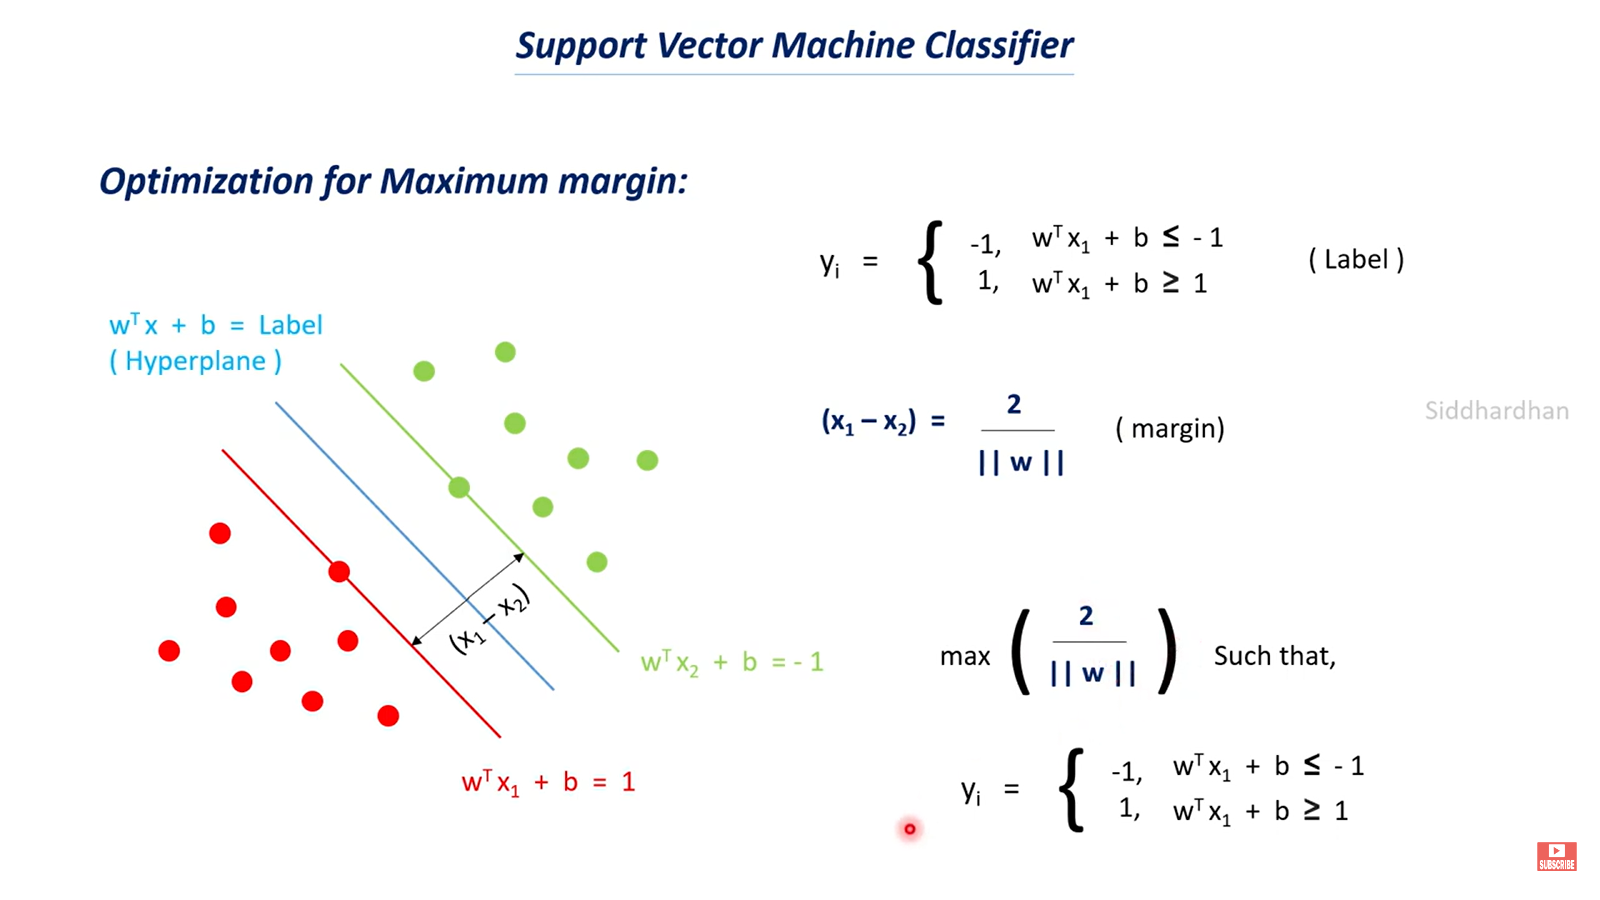

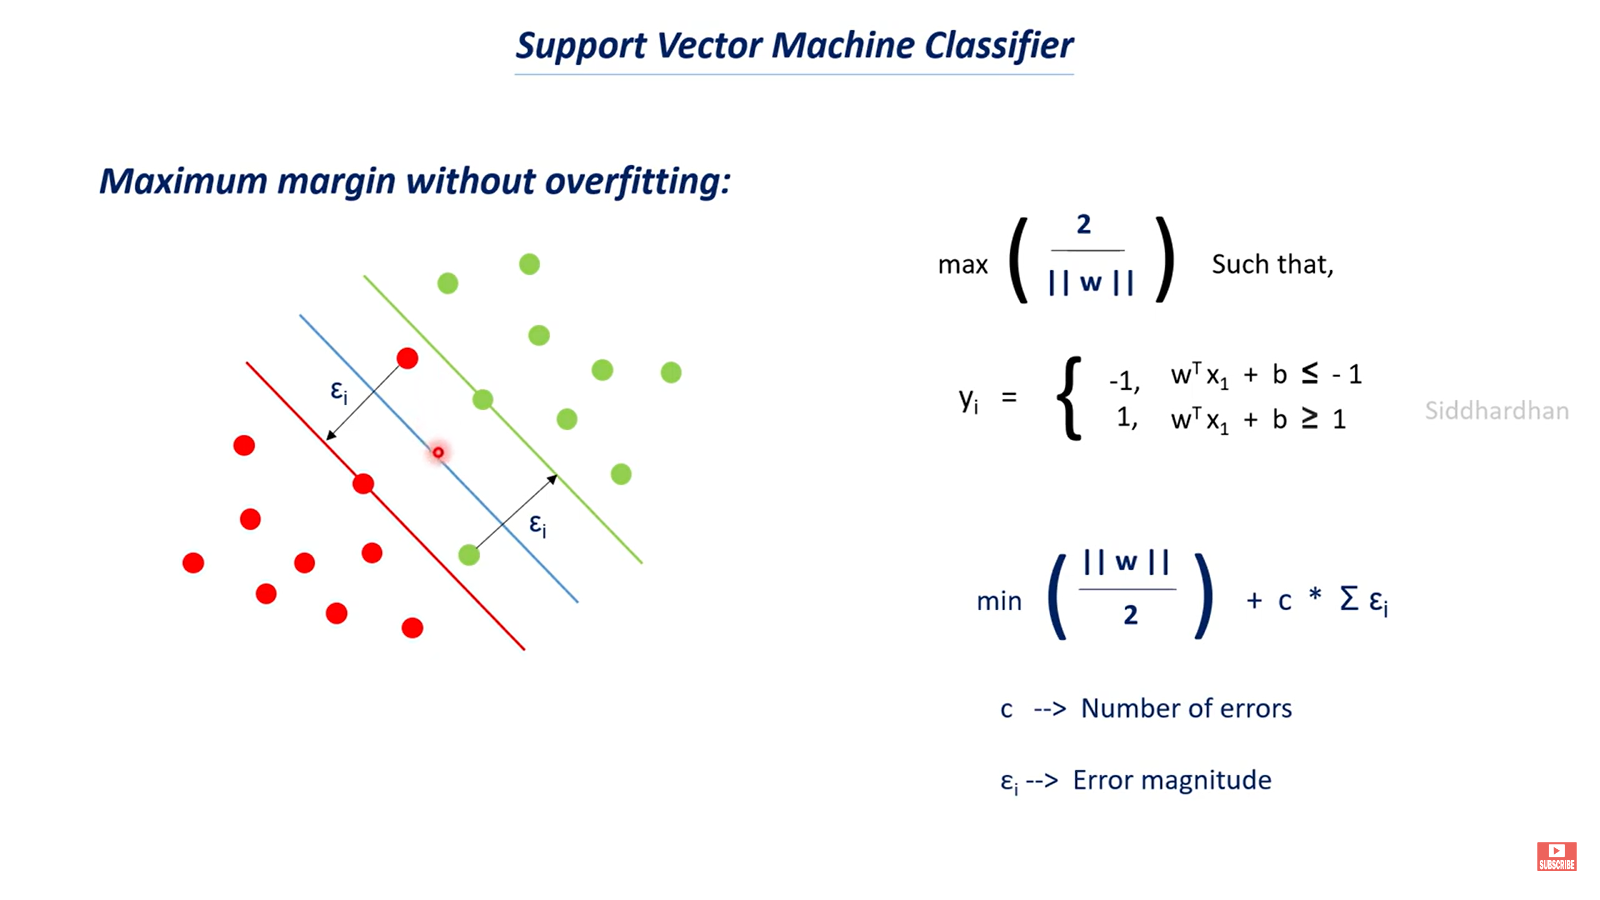

### Kernel:

kernel: Kernel function genreally transforms the traning set of data so that a non-linear decision surface can be transformed to a linear equation in a higher number of dimension spaces. It returns the inner product between two points in a standard feature dimensions.

Sometimes we are unable to draw a line in 2D. So we modified it into a 3D plot. It can be done in multiple dimensions.

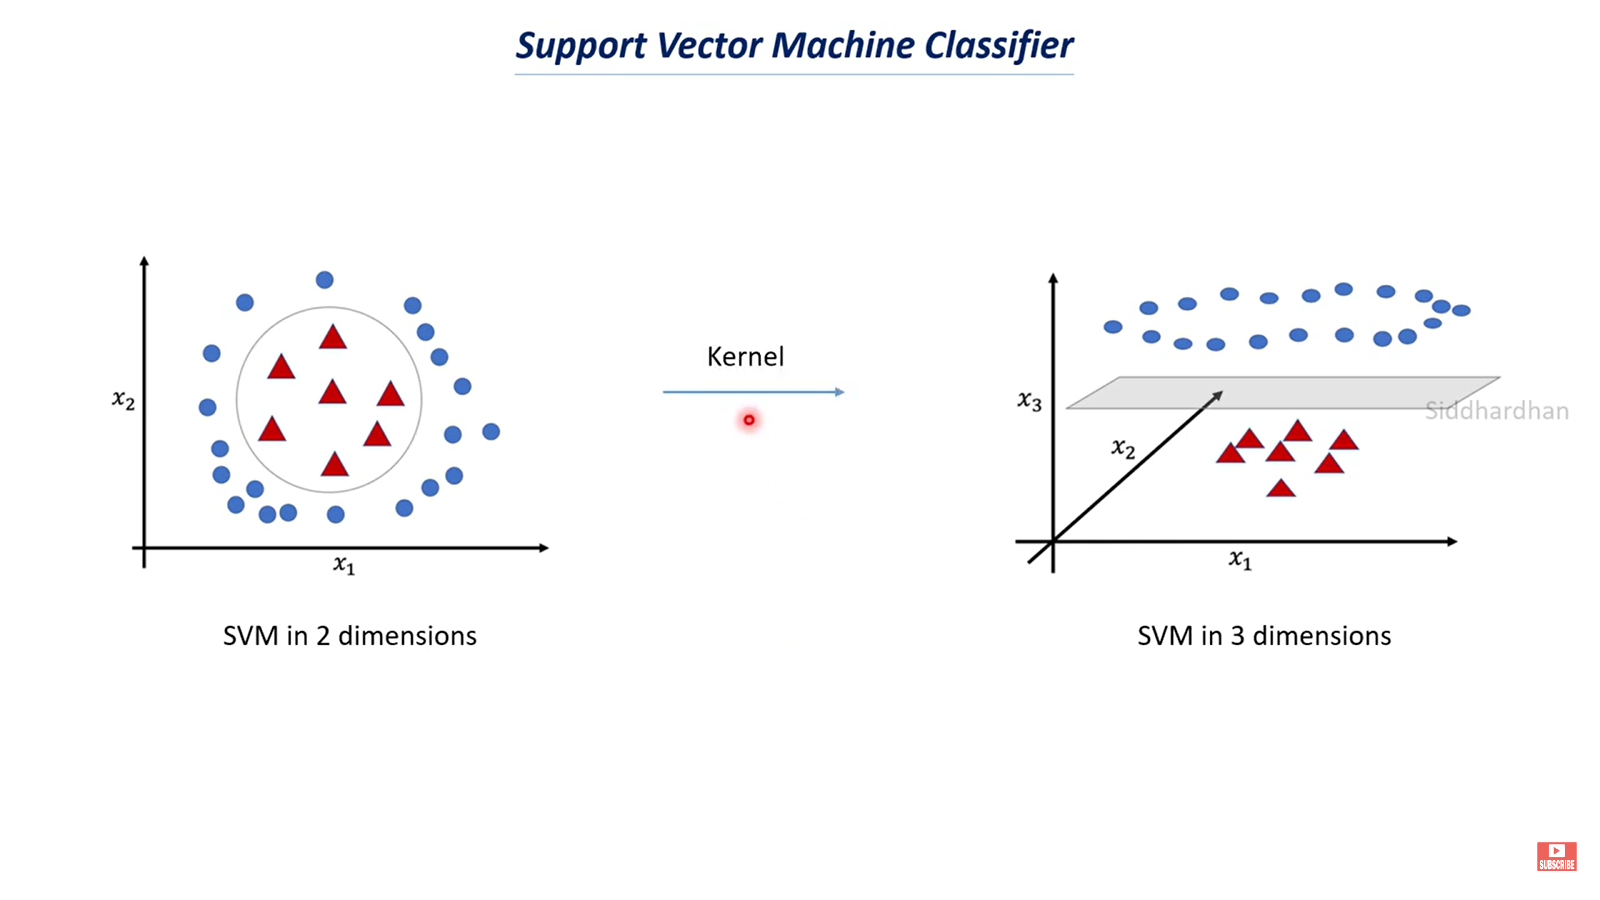

Types of SVM Kernels:
1. Linear
2. Polynomial
3. Radial Basis Function (RBF)
4. Sigmoid

More data ---> Linear

Less data, better accuracy ---> Polynomial, RDF, Sigmoid

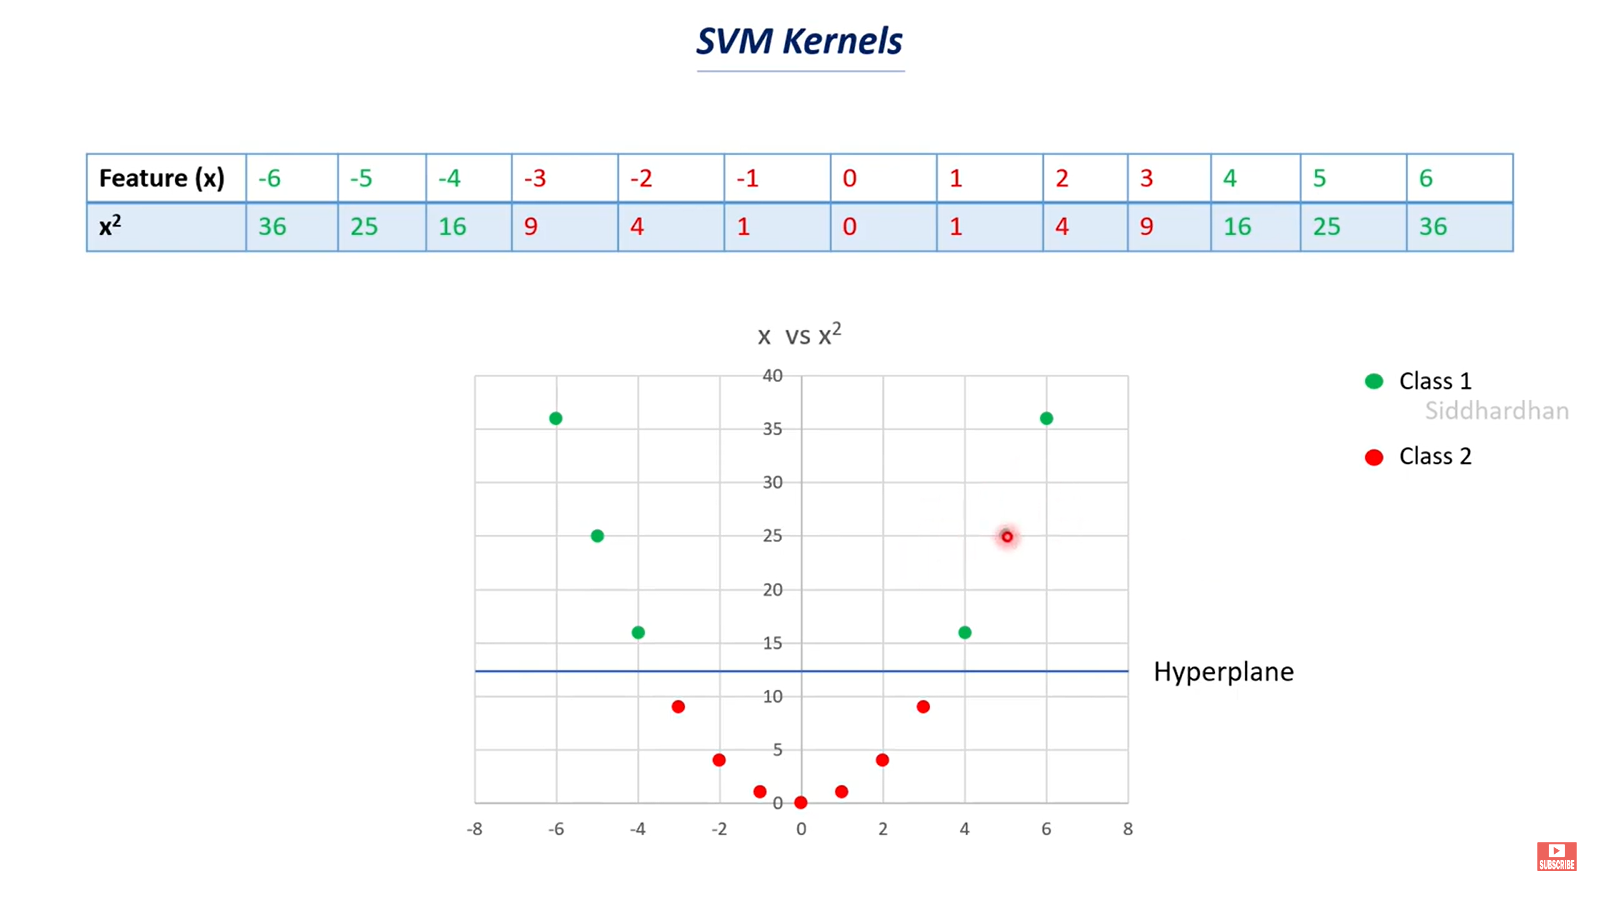

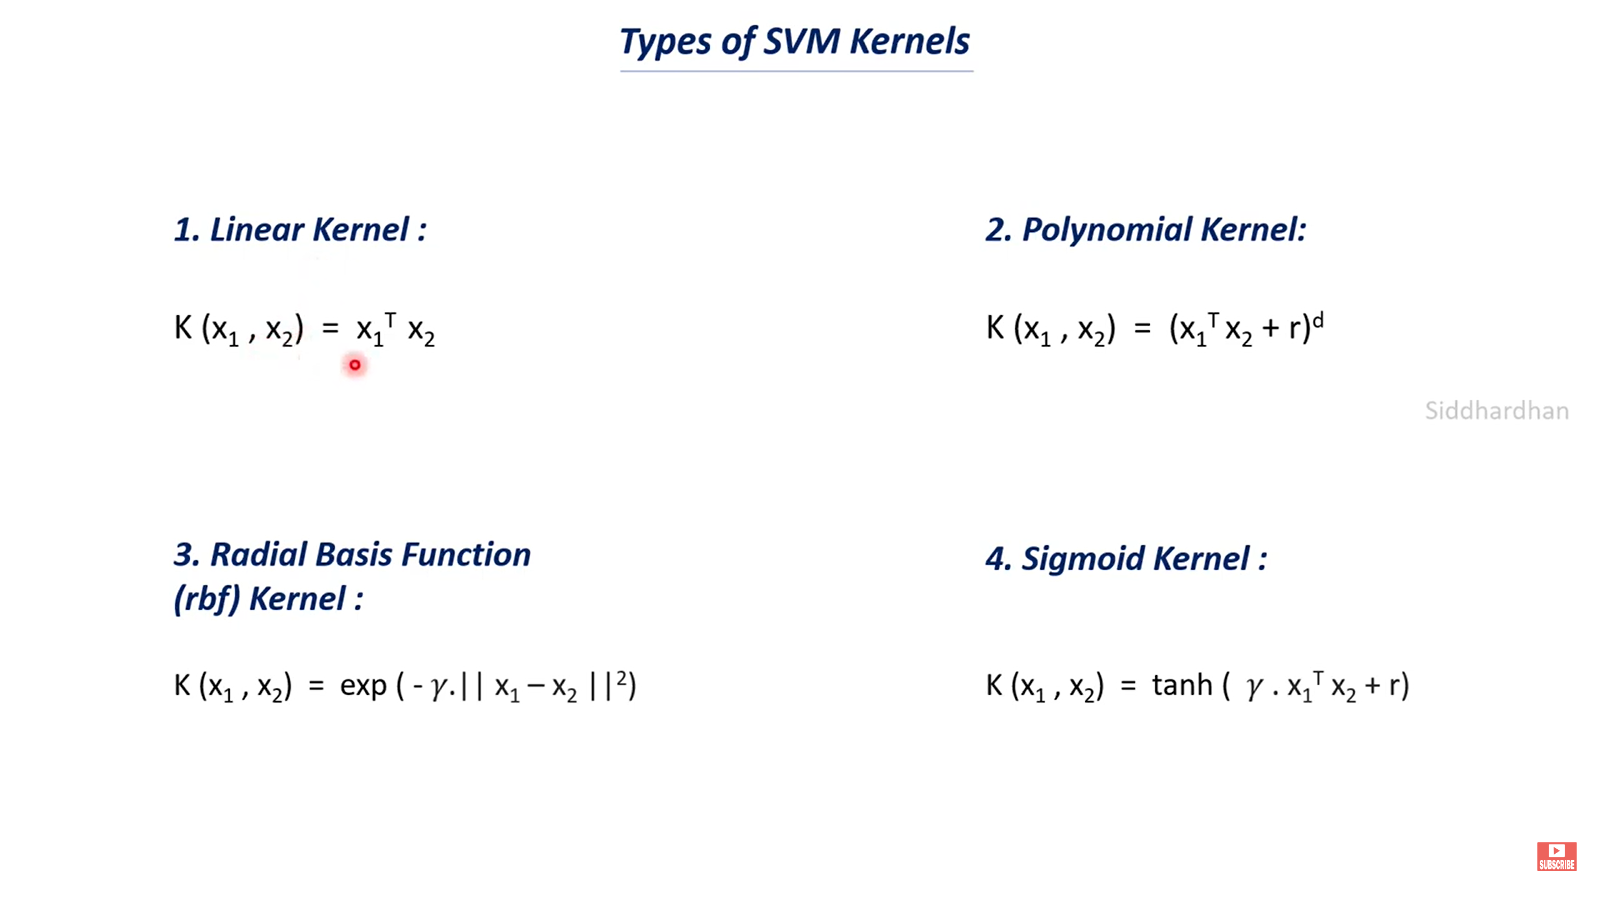

Where,

d = degree of the polynomial equation
- Higher values of d can capture more complex relationships in the data, but also increase the risk of overfitting.

r = a free parameter that represents a constant term.
- Adjusting r can change the shape of the decision boundary.

γ = a parameter that defines the influence of a single training example.
- A small γ means a large variance (smooth decision boundary), while a large γ means a small variance (more complex decision boundary).

### Cost Function

Loss Function: It measures how far an estimated value is fron its true value.


It is helpful to determine which model performs better & whoch parameters are better.


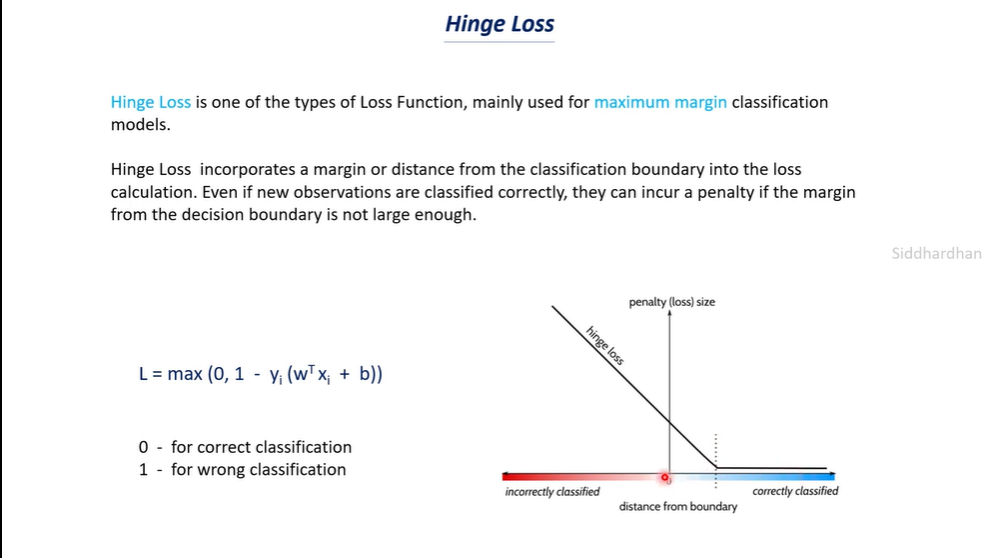

$Hinge Loss, L= max(0, 1 - y * y_h)$

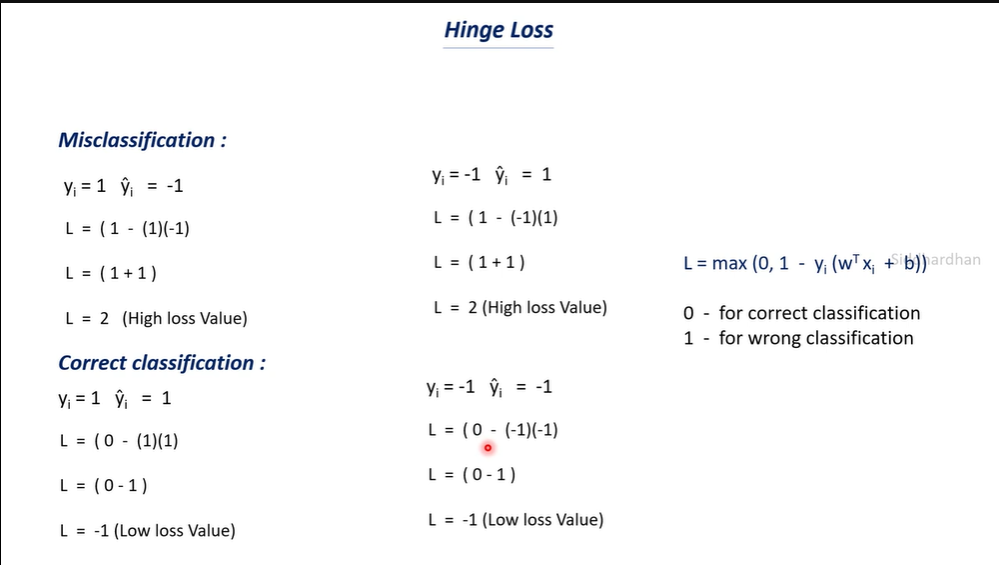

### Gradient Descent

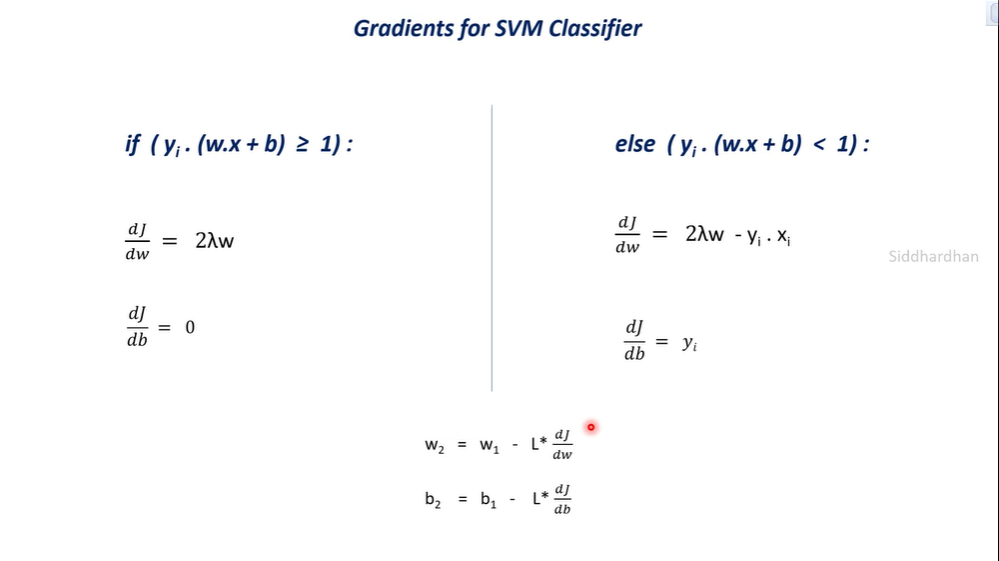

$Lamda$ is the regularization parameter. It gives importance to miss classified data.

We should have maximun margin and minimum miss classification.

# SVM from scratch

Equation of the Hyperplane:

**y = wx - b**  

**y = wx + b**

This -b equation giving more accuracy score

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
class SVM_Classifier():

  # initiating the hyperparameters
  def __init__(self, learning_rate=0.001, iterations=1000, lambda_parameter=0.01):

    self.learning_rate = learning_rate
    self.iterations = iterations
    self.lambda_parameter = lambda_parameter


  # fitting the dataset to SVM Classifier
  def fit(self, X, Y):

    self.m, self.n = X.shape

    # initiating the weights and bias
    self.W = np.zeros(self.n)
    self.b = 0

    self.X = X
    self.Y = Y

    # training the model
    for i in range(self.iterations):
      self.update_weights()

  # Both loop can be used
  # function for updating the weight and bias value
  def update_weights(self):

     y_label = np.where(self.Y <= 0, -1, 1)  # converting the label to -1 and 1

    # for index, x_i in enumerate(self.X):
    #  condition = y_label[index] * (np.dot(x_i, self.W) - self.b) >= 1

     for i in range(self.m):
      condition = y_label[i] * (np.dot(self.X[i], self.W) - self.b) >= 1
      if condition:
        dw = (2 * self.lambda_parameter * self.W)
        db = 0
      else:
        dw = (2 * self.lambda_parameter * self.W - np.dot(self.X[i], y_label[i]))
        db = y_label[i]

      self.W -= self.learning_rate * dw
      self.b -= self.learning_rate * db



  # predict the label for a given input value
  def predict(self, X):
    output = np.dot(X, self.W) - self.b

    predicted_labels = np.sign(output)

    y_hat = np.where(predicted_labels <= -1, 0, 1)

    return y_hat


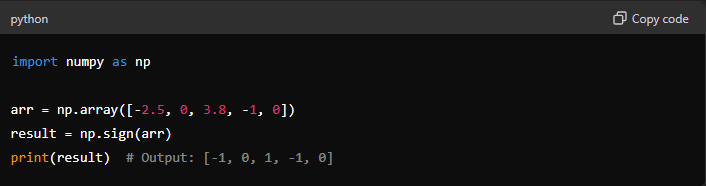

# Implementing SVM Classifier

## Data Collection and Visualization

In [ ]:
# loading the data from csv file to pandas dataframe
diabetes_data = pd.read_csv('/content/diabetes.csv')

In [ ]:
diabetes_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
# getting the statistical measures of the dataset
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diabetes_data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

0 --> Non-diabetic

1 --> Diabetic

In [ ]:
diabetes_data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

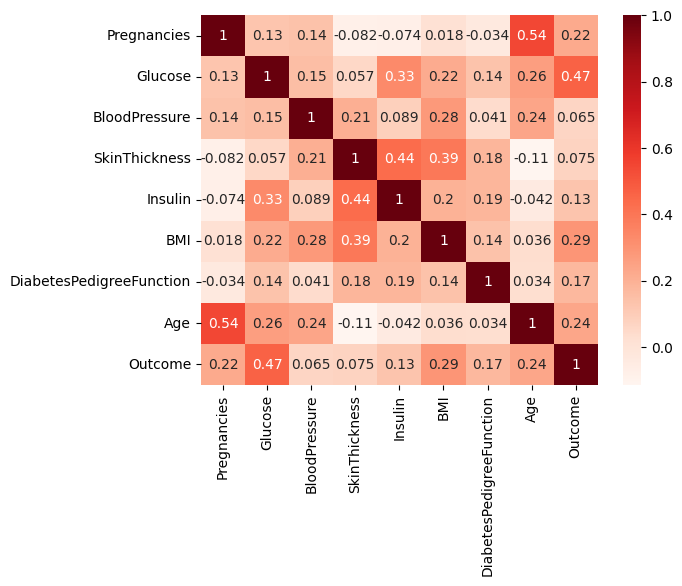

In [ ]:
sns.heatmap(diabetes_data.corr(), cmap='Reds', annot=True)

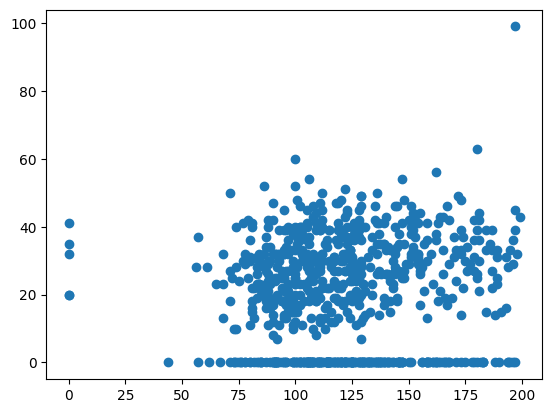

In [ ]:
plt.scatter(diabetes_data['Glucose'], diabetes_data['SkinThickness'])

In [ ]:
# separating the features and target

features = diabetes_data.drop(columns='Outcome', axis=1)

target = diabetes_data['Outcome']

## Data standardization

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(features)

StandardScaler()

In [ ]:
standardized_data = scaler.transform(features)

In [ ]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [ ]:

features = standardized_data
target = diabetes_data['Outcome']

In [ ]:
print(features)
print(target)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


## Train Test Split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.2, random_state = 2)

In [ ]:
print(features.shape, X_train.shape, X_test.shape)
print(target.shape, Y_train.shape, Y_test.shape)

(768, 8) (614, 8) (154, 8)
(768,) (614,) (154,)


## Model Evaluation

In [ ]:
classifier = SVM_Classifier()

In [ ]:
# training the SVM classifier with training data
classifier.fit(X_train, Y_train)

In [ ]:
# accuracy on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [ ]:
print('Accuracy score on training data = ', training_data_accuracy)

Accuracy score on training data =  0.7768729641693811


In [ ]:
# accuracy on training data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

In [ ]:
print('Accuracy score on test data = ', test_data_accuracy)

Accuracy score on test data =  0.7532467532467533


In [ ]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# change the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardizing the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')

else:
  print('The Person is diabetic')

[[ 0.3429808   1.41167241  0.14964075 -0.09637905  0.82661621 -0.78595734
   0.34768723  1.51108316]]
[1]
The Person is diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
